In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (에러 시 생략 가능)
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False

In [1]:
import pandas as pd

df = pd.read_csv("../data/telco.csv")

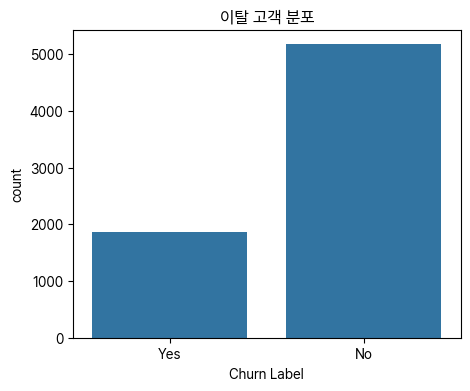

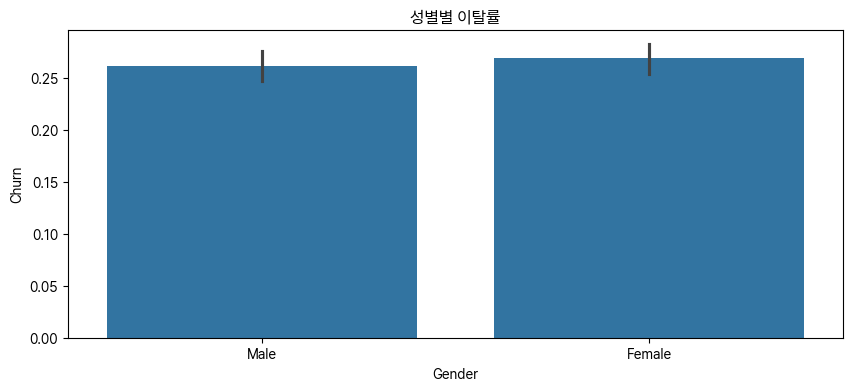

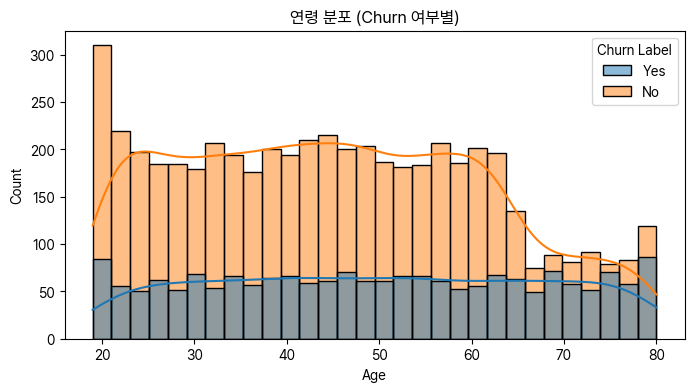

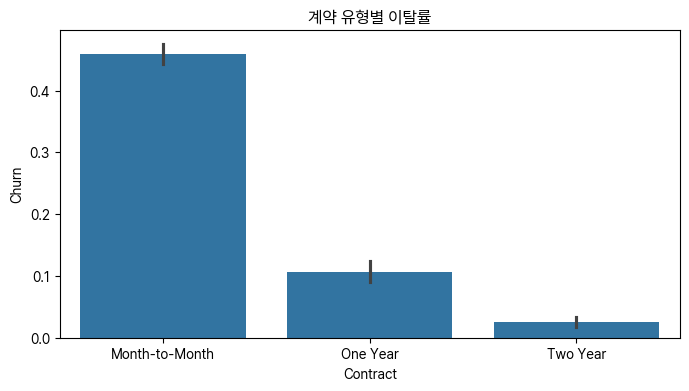

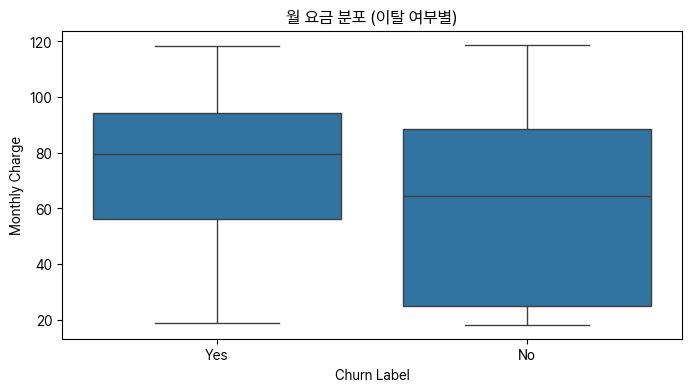

In [4]:
# 원본 백업
df_eda = df.copy()

# ✅ 1. 이탈 고객 비율 시각화
plt.figure(figsize=(5,4))
sns.countplot(x='Churn Label', data=df_eda)
plt.title("이탈 고객 분포")
plt.show()

# ✅ 2. 성별/연령별 이탈률 확인
plt.figure(figsize=(10,4))
sns.barplot(x='Gender', y='Churn', data=df_eda.assign(Churn=df_eda['Churn Label'].map({'Yes':1,'No':0})))
plt.title("성별별 이탈률")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(data=df_eda, x='Age', hue='Churn Label', bins=30, kde=True)
plt.title("연령 분포 (Churn 여부별)")
plt.show()

# ✅ 3. 계약 유형별 이탈률
plt.figure(figsize=(8,4))
sns.barplot(x='Contract', y='Churn', data=df_eda.assign(Churn=df_eda['Churn Label'].map({'Yes':1,'No':0})))
plt.title("계약 유형별 이탈률")
plt.show()

# ✅ 4. 월 요금 vs 이탈 여부
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn Label', y='Monthly Charge', data=df_eda)
plt.title("월 요금 분포 (이탈 여부별)")
plt.show()

| 분석 항목                                 | 주요 결과                                                                      | 인사이트 및 해석                                                         |
| ------------------------------------- | -------------------------------------------------------------------------- | ----------------------------------------------------------------- |
| ✅ **Churn Label 분포**<br>(이탈 여부 전체 분포) | - 잔존 고객 약 **73.5%**<br>- 이탈 고객 약 **26.5%**                                 | **클래스 불균형 존재** → 이탈 예측 모델 설계 시 **SMOTE** 등 보완 필요                  |
| ✅ **성별별 이탈률**                         | - Male, Female 간 큰 차이 없음<br>(모두 약 26\~27%)                                 | 성별 단독 변수는 **예측력 낮음** → **다른 변수와의 조합** 필요                          |
| ✅ **연령별 이탈 분포**                       | - 20대 고객 수 많고 이탈자도 많음<br>- 40\~50대 고르게 분포<br>- 고령층(60대↑)은 고객 수도 적고 이탈자도 적음 | **젊은 층은 유입 많지만 이탈률도 높음** → **장기 계약 유도, 혜택 리마인드** 등 전략 필요          |
| ✅ **계약 유형별 이탈률**                      | - Month-to-Month: **45%+**<br>- 1 Year: **약 11%**<br>- 2 Year: **3\~4%**   | **가장 강력한 단일 이탈 요인** 중 하나<br>→ **단기 계약 고객 = 고위험군** 명확              |
| ✅ **월 요금 분포 vs 이탈 여부**                | - 이탈 고객의 요금 평균/중앙값이 높음<br>(대략 80\~85달러)<br>- 잔존 고객은 저요금 사용자 비중 높음          | **고요금 고객의 이탈률 높음**<br>→ 비용 대비 만족도 이슈 가능<br>→ **고요금 고객 리텐션 전략 필요** |


🧠 종합 인사이트 요약
- 단기 계약 + 고요금 고객이 가장 대표적인 이탈 위험군

- 나이 어린 고객층은 유입은 많지만 이탈도 많아, 체류 유도 기능 강화 필요

- 성별은 직접 영향은 낮지만, 다른 변수와 함께 보면 유의미할 수 있음

- 앞으로의 분석에서는 변수 간 복합작용을 중심으로 이탈 요인을 탐색하는 것이 중요

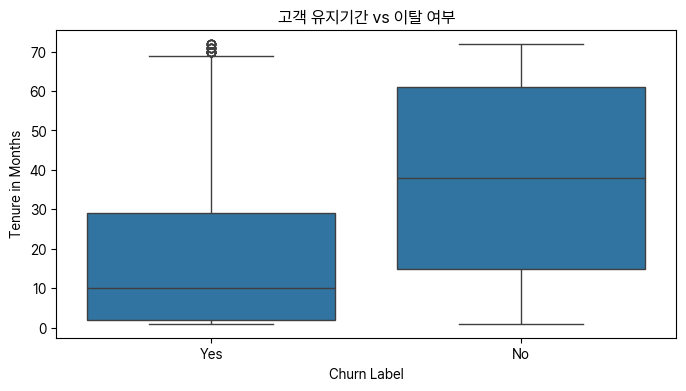

              count       mean        std  min   25%   50%   75%   max
Churn Label                                                           
No           5174.0  37.591225  24.085029  1.0  15.0  38.0  61.0  72.0
Yes          1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


In [6]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn Label', y='Tenure in Months', data=df_eda)
plt.title("고객 유지기간 vs 이탈 여부")
plt.show()

# 평균 유지기간 비교
print(df_eda.groupby('Churn Label')['Tenure in Months'].describe())

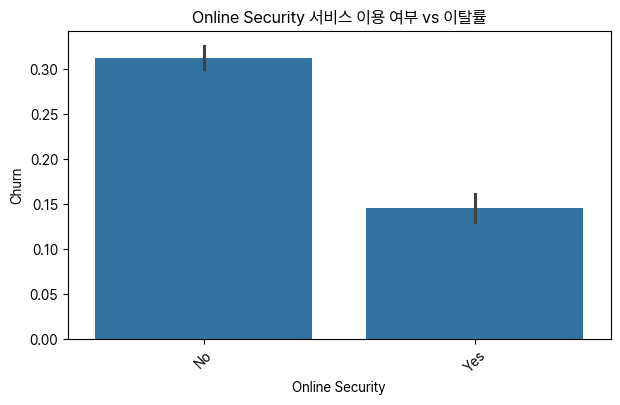

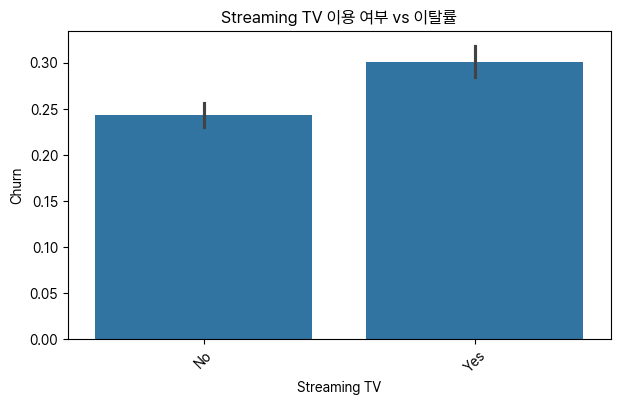

In [8]:
# 시각화를 위해 타겟을 수치로 변환
df_eda['Churn'] = df_eda['Churn Label'].map({'Yes':1, 'No':0})

# ✅ 온라인 보안 서비스
plt.figure(figsize=(7,4))
sns.barplot(x='Online Security', y='Churn', data=df_eda)
plt.title("Online Security 서비스 이용 여부 vs 이탈률")
plt.xticks(rotation=45)
plt.show()

# ✅ 스트리밍 TV
plt.figure(figsize=(7,4))
sns.barplot(x='Streaming TV', y='Churn', data=df_eda)
plt.title("Streaming TV 이용 여부 vs 이탈률")
plt.xticks(rotation=45)
plt.show()

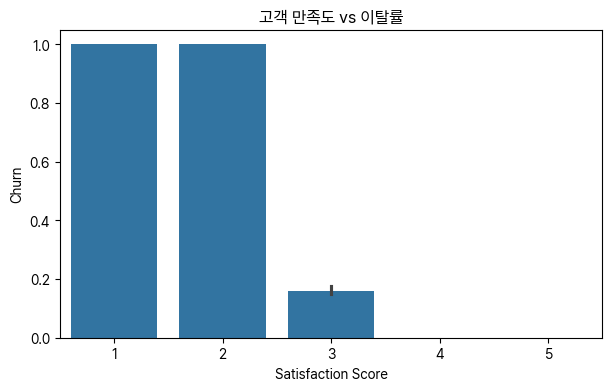

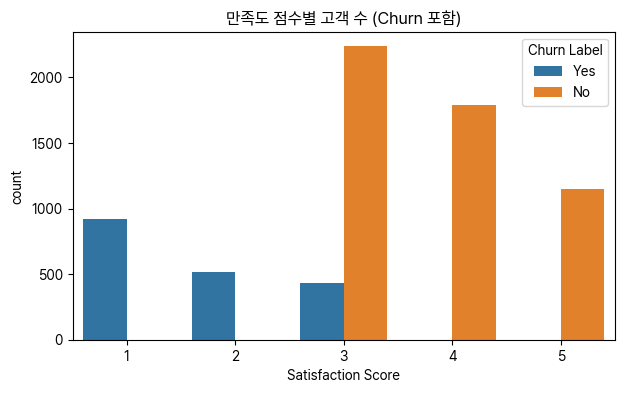

In [9]:
plt.figure(figsize=(7,4))
sns.barplot(x='Satisfaction Score', y='Churn', data=df_eda)
plt.title("고객 만족도 vs 이탈률")
plt.show()

# 만족도별 고객 수 분포도
plt.figure(figsize=(7,4))
sns.countplot(x='Satisfaction Score', hue='Churn Label', data=df_eda)
plt.title("만족도 점수별 고객 수 (Churn 포함)")
plt.show()

✅ 6. 고객 만족도 (Satisfaction Score)
1~2점 고객: 이탈률 100%

3점부터 이탈률 급감, 4~5점 고객은 거의 0%

✅ "만족도 점수는 이탈 예측에 있어 가장 강력한 단일 변수 중 하나"

✅ 점수 1~2점 고객군 → 즉시 리텐션 개입, CS 연결, 자동 혜택 발송 등 실무 적용 가능

| 핵심 위험군                    | 전략 방향                              |
| ------------------------- | ---------------------------------- |
| **단기 계약 + 고요금 + 보안 미가입자** | 이탈률 매우 높음 → 타겟 리텐션 마케팅 필수          |
| **만족도 점수 1\~2점 고객**       | 즉각적 CS 개입, 보상안 제안, 해지방지 기능 적용      |
| **스트리밍 이용자 중 고요금군**       | 기대치 충족 부족 시 이탈 유도 → 콘텐츠/혜택 리마인드 필요 |
| **유지기간 1년 미만 고객**         | 이탈 가능성 높음 → 3/6/9개월 시점 리텐션 이벤트 적기  |

# 범주형으로 전환

In [13]:
# 복사본 생성
df_bin = df_eda.copy()

# 1. Monthly Charge 구간화
df_bin['MonthlyChargeGroup'] = pd.cut(
    df_bin['Monthly Charge'],
    bins=[0, 50, 80, float('inf')],
    labels=['Low', 'Mid', 'High']
)

# 2. Tenure 구간화
df_bin['TenureGroup'] = pd.cut(
    df_bin['Tenure in Months'],
    bins=[0, 12, 24, float('inf')],
    labels=['Short', 'Mid', 'Long']
)

# 3. Age 구간화 (10년 단위)
df_bin['AgeGroup'] = pd.cut(
    df_bin['Age'],
    bins=[0, 29, 39, 49, 59, 69, float('inf')],
    labels=['20s', '30s', '40s', '50s', '60s', '70+']
)

# 확인
print(df_bin[['Monthly Charge', 'MonthlyChargeGroup']].head())
print(df_bin[['Tenure in Months', 'TenureGroup']].head())
print(df_bin[['Age', 'AgeGroup']].head())

   Monthly Charge MonthlyChargeGroup
0           39.65                Low
1           80.65               High
2           95.45               High
3           98.50               High
4           76.50                Mid
   Tenure in Months TenureGroup
0                 1       Short
1                 8       Short
2                18         Mid
3                25        Long
4                37        Long
   Age AgeGroup
0   78      70+
1   74      70+
2   71      70+
3   78      70+
4   80      70+


# 교차 시각화

📊 계약 유형 + 온라인 보안 조합별 이탈률
Online Security     No    Yes
Contract                     
Month-to-Month   0.489  0.322
One Year         0.108  0.105
Two Year         0.024  0.028


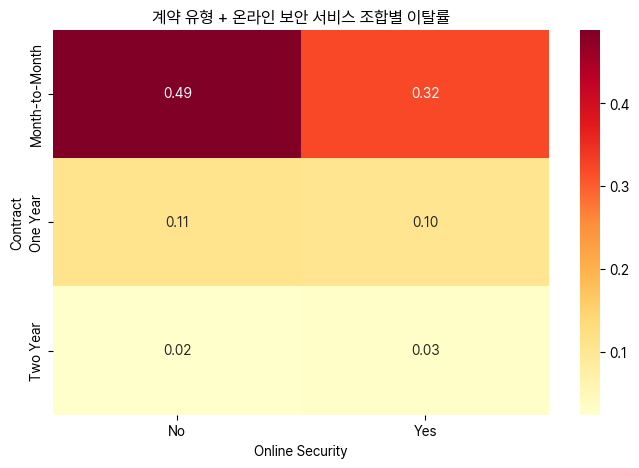

In [10]:
# 계약 유형과 Online Security 조합별 이탈률
pivot_df = df_eda.pivot_table(
    index='Contract',
    columns='Online Security',
    values='Churn',
    aggfunc='mean'
)

print("📊 계약 유형 + 온라인 보안 조합별 이탈률")
print(pivot_df.round(3))

# Heatmap 시각화
plt.figure(figsize=(8,5))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap='YlOrRd')
plt.title("계약 유형 + 온라인 보안 서비스 조합별 이탈률")
plt.show()

In [15]:
# 교차 이탈률 시각화 함수
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def churn_heatmap(df, row_var, col_var):
    temp_df = df.copy()
    temp_df['Churn'] = temp_df['Churn Label'].map({'Yes': 1, 'No': 0})
    pivot_table = temp_df.pivot_table(
        index=row_var,
        columns=col_var,
        values='Churn',
        aggfunc='mean'
    )
    plt.figure(figsize=(8,5))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlOrRd')
    plt.title(f"{row_var} × {col_var} 조합별 이탈률")
    plt.ylabel(row_var)
    plt.xlabel(col_var)
    plt.show()

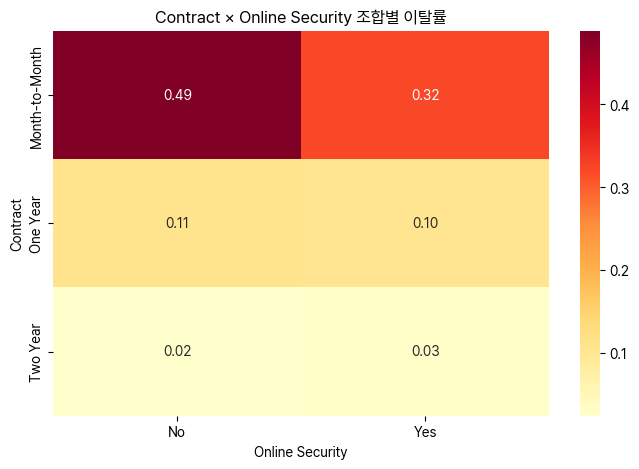

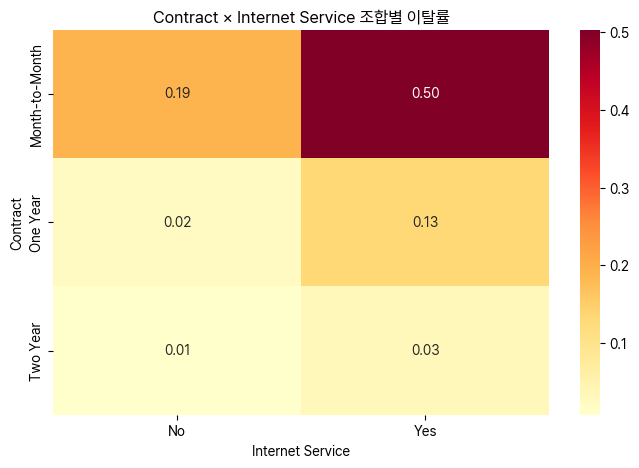

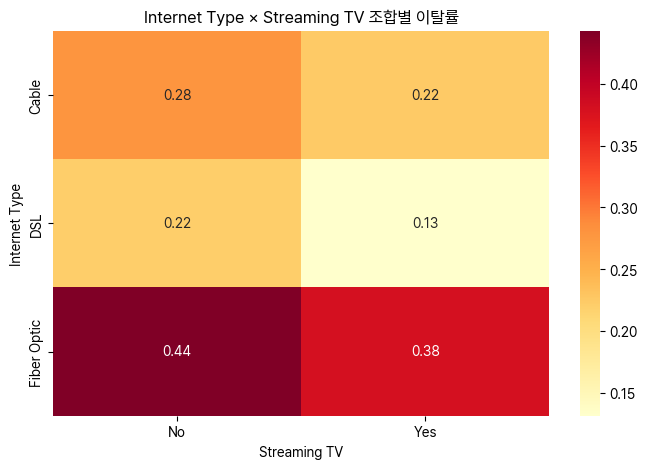

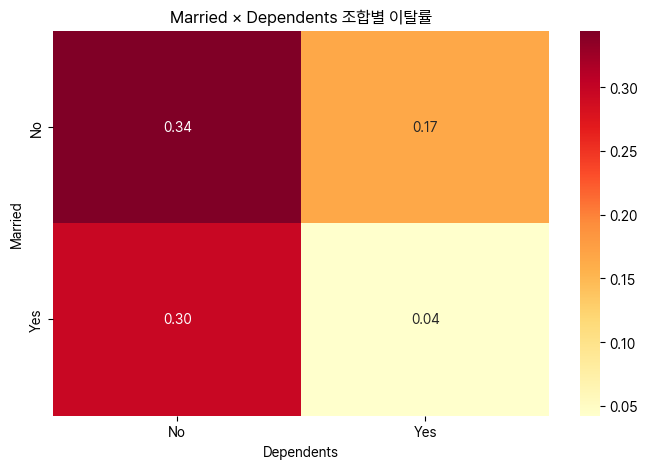

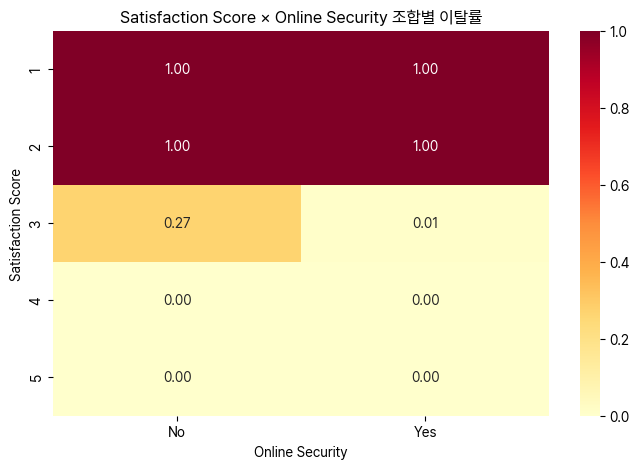

In [16]:
# 계약유형 × Online Security
churn_heatmap(df_eda, 'Contract', 'Online Security')

# 계약유형 × Internet Service
churn_heatmap(df_eda, 'Contract', 'Internet Service')

# Internet Type × Streaming TV
churn_heatmap(df_eda, 'Internet Type', 'Streaming TV')

# Married × Dependents
churn_heatmap(df_eda, 'Married', 'Dependents')

# Satisfaction Score × Online Security
churn_heatmap(df_eda, 'Satisfaction Score', 'Online Security')

| 번호 | 교차 변수 조합                                     | 주요 인사이트                                                                 | 전략 제안                                         |
| -- | -------------------------------------------- | ----------------------------------------------------------------------- | --------------------------------------------- |
| ①  | `Contract × Online Security`                 | `Month-to-Month + 보안 미가입자` 이탈률 **0.49**로 최고 위험군                         | 보안 서비스 미가입 단기계약자 대상 **무료 체험 or 장기 전환 혜택**     |
| ②  | `Contract × Internet Service`                | `인터넷 사용 + 단기 계약자` 이탈률 **0.50**로 급증                                      | **장기 계약 유도 + 인터넷 번들 프로모션**                    |
| ③  | `Internet Type × Streaming TV`               | **Fiber Optic 사용자는 전반적으로 이탈률 ↑**, DSL 안정군                               | 광랜 사용자 = 고요금 고객 → **품질/만족도 강화 알림 or 모니터링 타겟** |
| ④  | `Married × Dependents`                       | `기혼 + 부양가족 있음` 이탈률 **0.04**로 최저, `미혼 + 가족 없음` **0.34**로 최고              | 라이프스타일 기반 **페르소나 마케팅** 및 충성 전략 차등 적용          |
| ⑤  | `Satisfaction Score × Online Security`       | `만족도 3점 이하 + 보안 미가입` → 이탈률 0.27\~1.00<br>`만족도 3점 이상 + 보안 이용` → 이탈률 거의 0 | **만족도 낮은 고객 = 보안 서비스 설치 유도** / 불만족군 우선 대응     |
| ⑥  | `Satisfaction Score × Online Security` (재확인) | 1\~2점 고객은 **보안 여부 상관없이 100% 이탈**                                        | **1\~2점 고객군 자동 식별 및 긴급 대응 (혜택, 상담 등)**        |

종합 통찰
- 단기 계약 + 보안 미이용 + 스트리밍/인터넷 이용 = 이탈 위험 핵심 조건

- 만족도 3점 미만은 전원 이탈 또는 거의 전원 이탈

- 고객의 계약 형태, 가족 구성, 인터넷 유형에 따라 행동적 세그먼트 명확하게 나뉨

| 기능 아이디어         | 적용 대상          | 전달 방식             |
| --------------- | -------------- | ----------------- |
| 보안 서비스 무료 체험 알림 | 단기계약자 + 보안 미가입 | 앱 알림 / 이메일        |
| 장기계약 전환 리마인드    | 월단위 계약자        | 청구서 동봉 / 앱 배너     |
| 불만족 고객 즉시 케어    | 만족도 1\~2점 고객   | 전담 상담 연결 / 리워드 제공 |
| 혼자 사는 고객 혜택 제안  | 미혼 + 가족 없음     | 개인화 추천 메시지        |

C:\Users\somee\AppData\Local\Temp\ipykernel_23392\2172697734.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = temp_df.pivot_table(


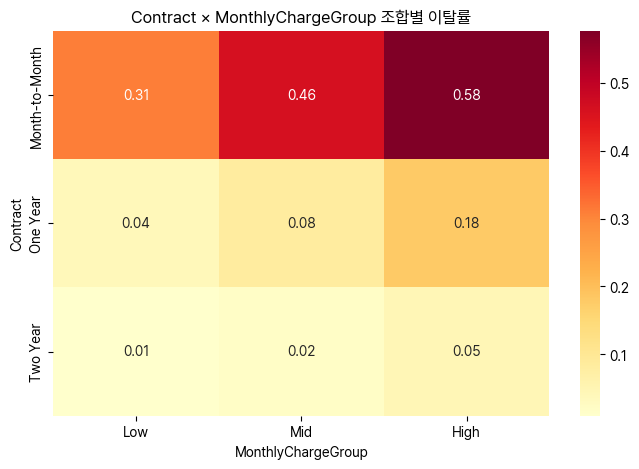

C:\Users\somee\AppData\Local\Temp\ipykernel_23392\2172697734.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = temp_df.pivot_table(


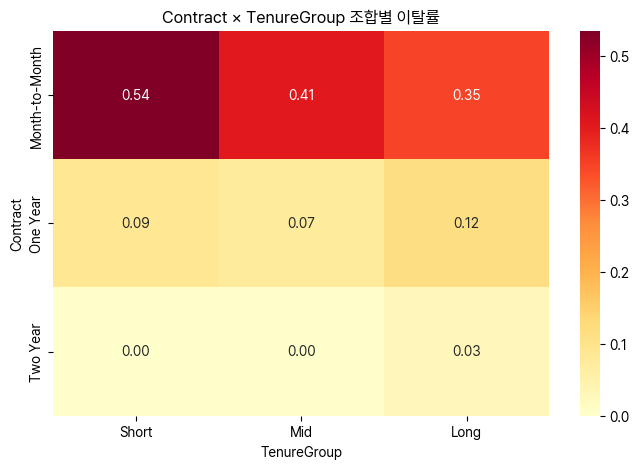

C:\Users\somee\AppData\Local\Temp\ipykernel_23392\2172697734.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = temp_df.pivot_table(


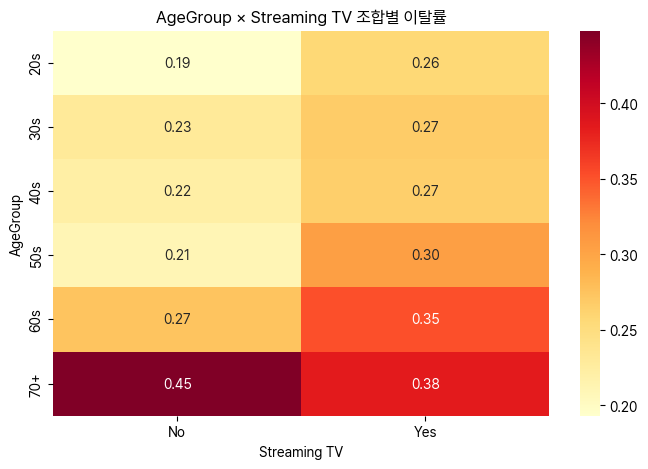

In [17]:
# 계약 유형 × 요금 구간
churn_heatmap(df_bin, 'Contract', 'MonthlyChargeGroup')

# 계약 유형 × 이용 기간 구간
churn_heatmap(df_bin, 'Contract', 'TenureGroup')

# 연령대 × 스트리밍 서비스
churn_heatmap(df_bin, 'AgeGroup', 'Streaming TV')

| 공통 패턴                 | 설명                     | 실무 적용 아이디어                     |
| --------------------- | ---------------------- | ------------------------------ |
| 단기계약 + 고요금 or 짧은 이용기간 | **이탈 위험 최상위 조합**       | 장기계약 전환 유도 / 가격 민감군 리마인드       |
| 고령층 (60대+)            | **전반적으로 이탈률 높음**       | 고령층 UX 개선 / 고객센터 접근 강화 / 전용 CS |
| TV 스트리밍 사용자           | 기대 수준 높을 가능성 → 불만 시 이탈 | 콘텐츠 다양성, 혜택 홍보, 개인화 추천 연계      |

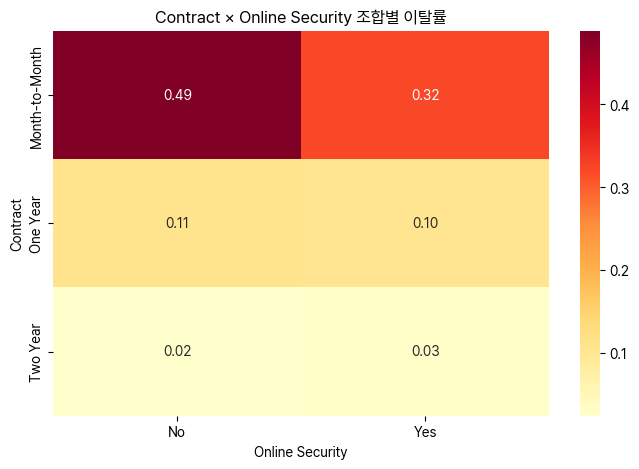

C:\Users\somee\AppData\Local\Temp\ipykernel_23392\2172697734.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = temp_df.pivot_table(


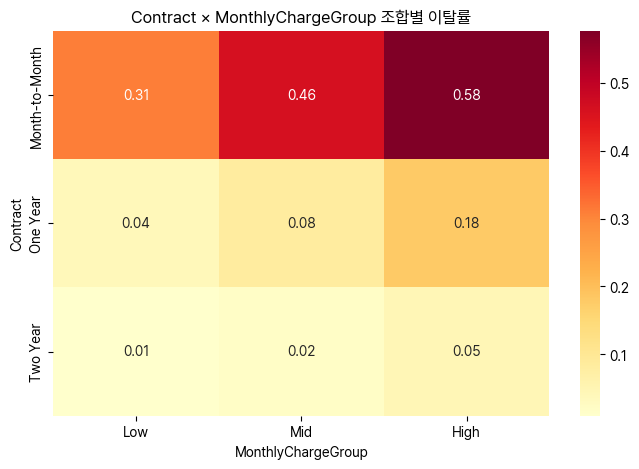

C:\Users\somee\AppData\Local\Temp\ipykernel_23392\2172697734.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = temp_df.pivot_table(


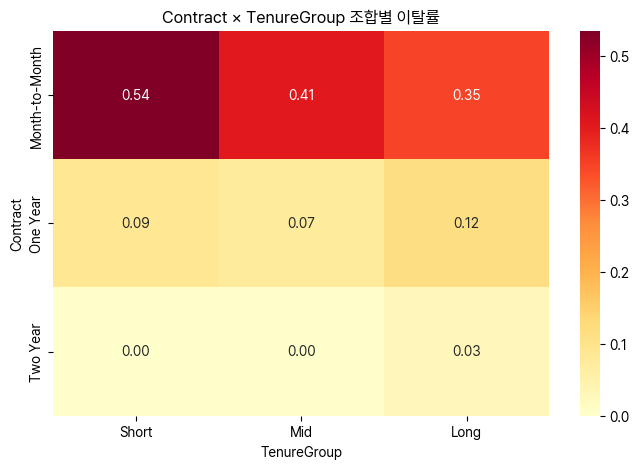

C:\Users\somee\AppData\Local\Temp\ipykernel_23392\2172697734.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = temp_df.pivot_table(


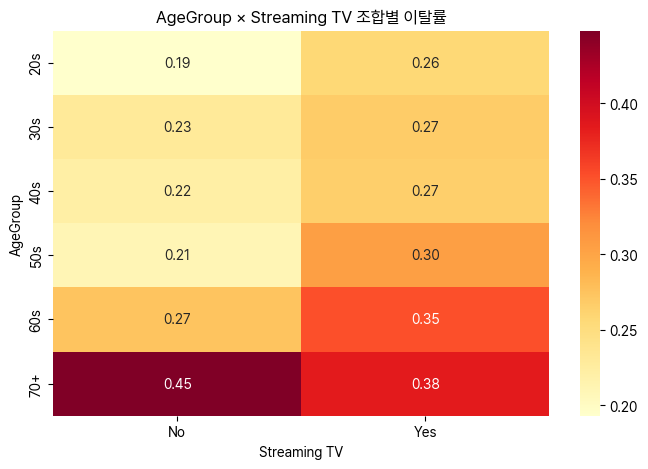

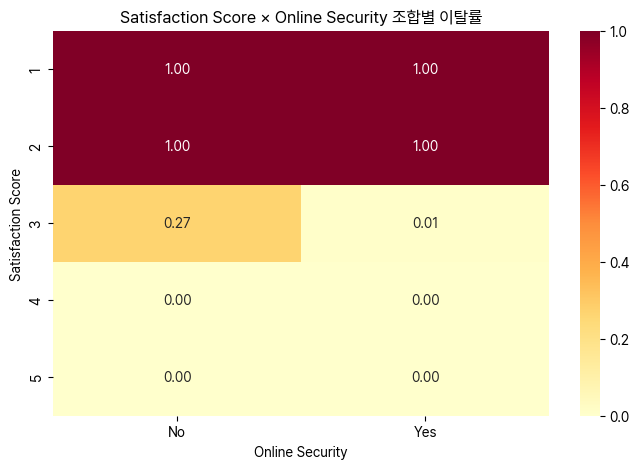

C:\Users\somee\AppData\Local\Temp\ipykernel_23392\2172697734.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = temp_df.pivot_table(


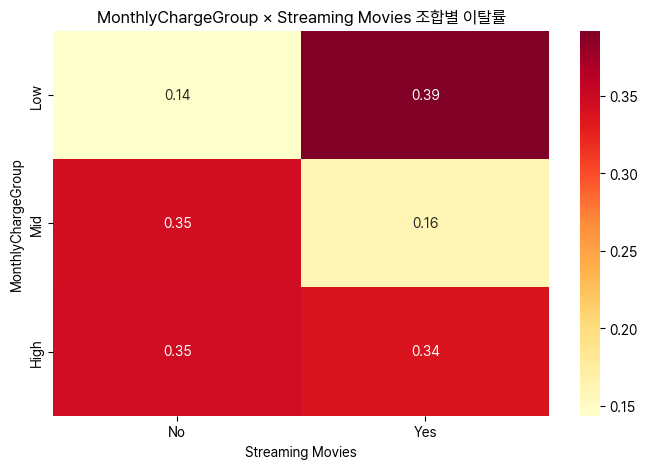

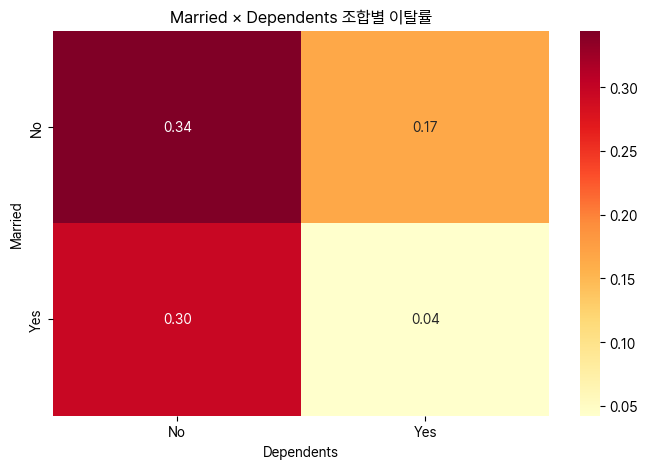

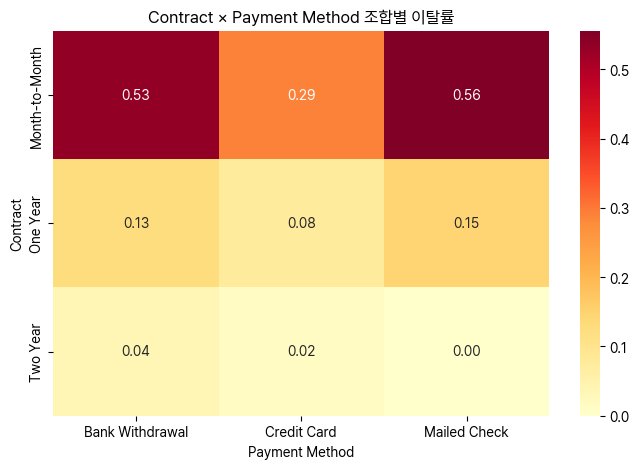

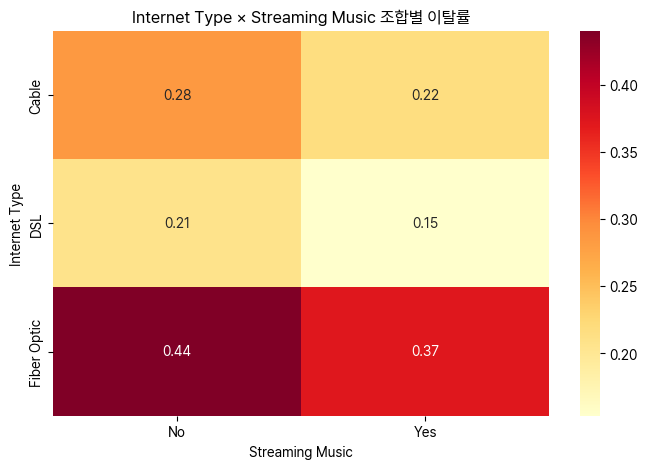

C:\Users\somee\AppData\Local\Temp\ipykernel_23392\2172697734.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = temp_df.pivot_table(


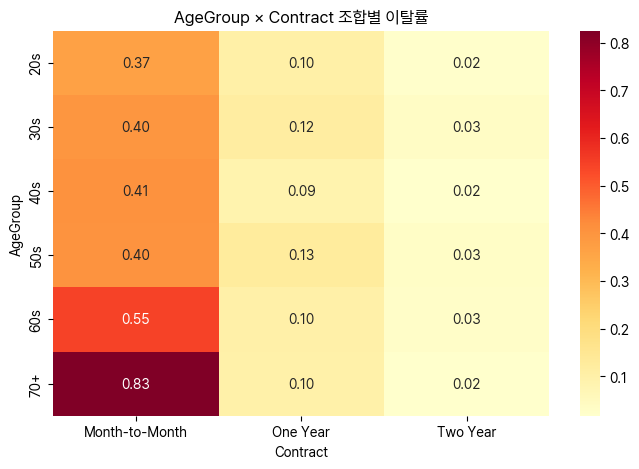

In [19]:
churn_heatmap(df_bin, 'Contract', 'Online Security')
churn_heatmap(df_bin, 'Contract', 'MonthlyChargeGroup')
churn_heatmap(df_bin, 'Contract', 'TenureGroup')
churn_heatmap(df_bin, 'AgeGroup', 'Streaming TV')
churn_heatmap(df_bin, 'Satisfaction Score', 'Online Security')
churn_heatmap(df_bin, 'MonthlyChargeGroup', 'Streaming Movies')
churn_heatmap(df_bin, 'Married', 'Dependents')
churn_heatmap(df_bin, 'Contract', 'Payment Method')
churn_heatmap(df_bin, 'Internet Type', 'Streaming Music')
churn_heatmap(df_bin, 'AgeGroup', 'Contract')

| 번호 | 교차 변수 조합                              | 주요 이탈 조합                | 이탈률      | 인사이트 요약                 | 전략 제안                      |
| -- | ------------------------------------- | ----------------------- | -------- | ----------------------- | -------------------------- |
| ①  | Contract × Online Security            | 월단위 + 보안 미가입            | **0.49** | 보안 미이용 시 이탈률 상승         | 보안 서비스 무료 체험 or 자동 설치 유도   |
| ②  | Contract × MonthlyChargeGroup         | 월단위 + 고요금(High)         | **0.58** | 고요금 단기계약자 = 고위험군        | 요금 리마인드 + 장기 전환 프로모션       |
| ③  | Contract × TenureGroup                | 월단위 + 단기 체류             | **0.54** | 가입 초반 이탈 집중             | 3/6개월 시점 맞춤 리텐션 알림         |
| ④  | AgeGroup × Streaming TV               | 70대 + TV 미이용            | **0.45** | 고령층 TV 이용 여부 무관하게 이탈률 ↑ | 고령층 맞춤 UX / 상담 접근성 개선      |
| ⑤  | Satisfaction × Online Security        | 만족도 1\~2점 전체            | **1.00** | 불만족 고객은 모두 이탈           | 1\~2점 고객군 CS/보상 우선 개입      |
| ⑥  | MonthlyChargeGroup × Streaming Movies | 저요금 + 영화 이용             | **0.39** | 기대대비 품질 미흡 인식 가능성       | 콘텐츠 안내 / 추천 시스템 개선         |
| ⑦  | Married × Dependents                  | 미혼 + 가족 없음              | **0.34** | 기혼 + 부양가족 있는 고객 안정      | 라이프스타일 기반 개인화 전략           |
| ⑧  | Contract × Payment Method             | 월단위 + 수표 (Mailed Check) | **0.56** | 전통 결제 방식 사용자 이탈 ↑       | 디지털 결제 전환 유도               |
| ⑨  | Internet Type × Streaming Music       | 광랜 + 스트리밍 미이용           | **0.44** | 고속망인데 콘텐츠 안 씀 → 이탈 ↑    | 콘텐츠 큐레이션 / 홍보 강화           |
| ⑩  | AgeGroup × Contract                   | 70대 + 월단위 계약            | **0.83** | 전체 최고 이탈 조합             | 70대 이상 전용 장기계약 제안 or 상담 기능 |

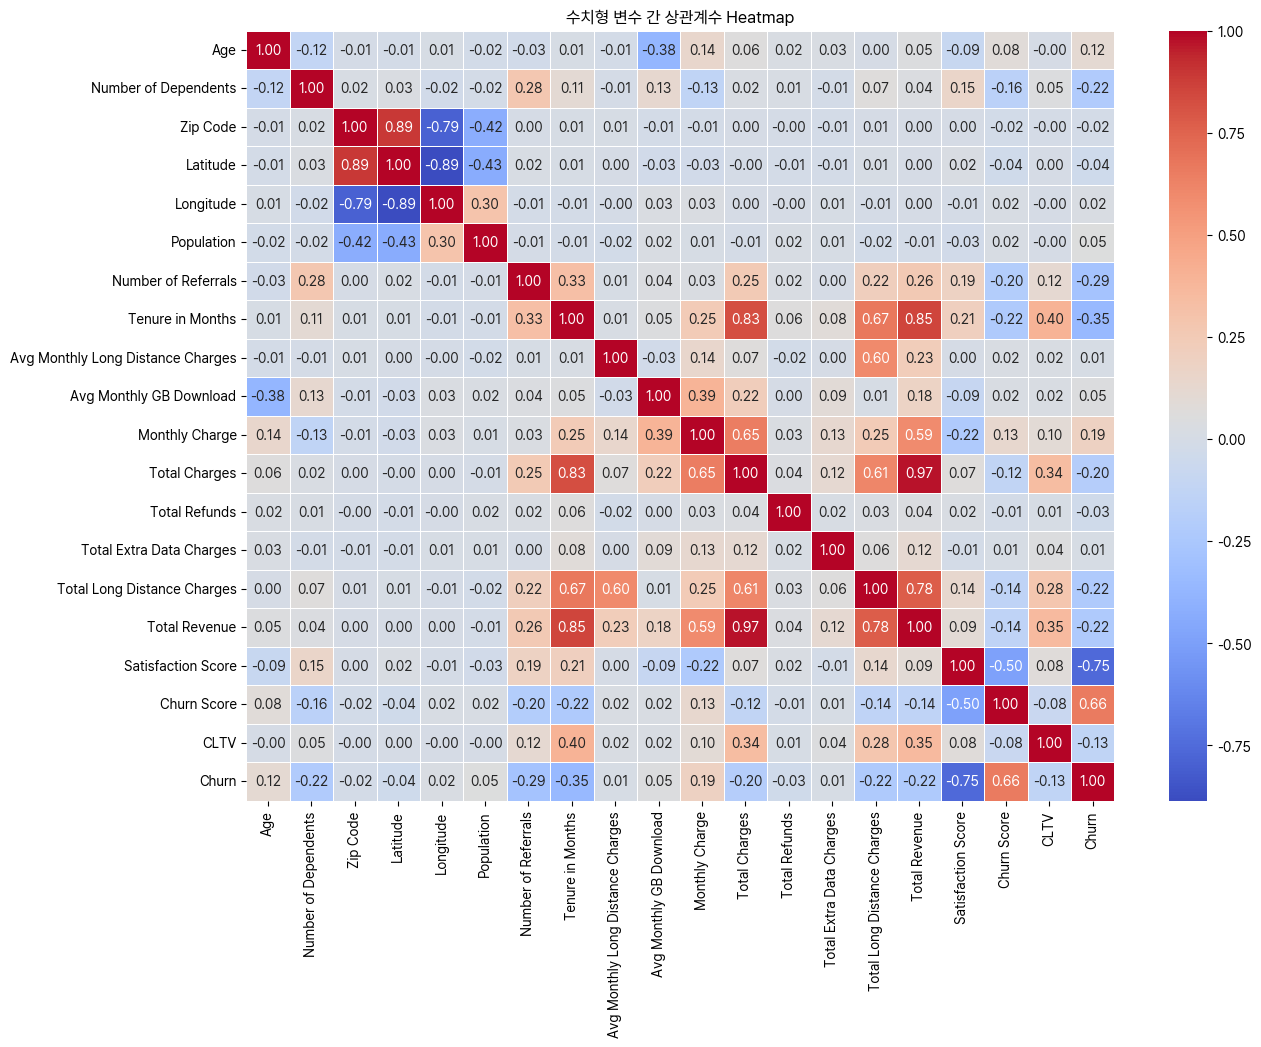

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 추출
numeric_df = df_eda.select_dtypes(include=['int64', 'float64'])

# 이탈 변수 Churn 수치화
numeric_df['Churn'] = df_eda['Churn Label'].map({'Yes': 1, 'No': 0})

# 상관계수 계산
corr = numeric_df.corr()

# 히트맵 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("수치형 변수 간 상관계수 Heatmap")
plt.show()

In [22]:
import pandas as pd

# 수치형 변수만 필터링
numeric_df = df_eda.select_dtypes(include=['int64', 'float64']).copy()

# Churn 수치형으로 변환
numeric_df['Churn'] = df_eda['Churn Label'].map({'Yes': 1, 'No': 0})

# 상관계수 계산
corr_matrix = numeric_df.corr()

# Churn과의 상관계수 추출 및 정렬
churn_corr = corr_matrix['Churn'].drop('Churn')  # 자기 자신 제외

# 절댓값 기준으로 상위 N개 추출
top_n = 10  # 상위 10개 기준
top_corr = churn_corr.reindex(churn_corr.abs().sort_values(ascending=False).index)[:top_n]

# 출력
print("📊 Churn과 상관계수 상위 변수:")
print(top_corr)

📊 Churn과 상관계수 상위 변수:
Satisfaction Score            -0.754649
Churn Score                    0.660772
Tenure in Months              -0.352861
Number of Referrals           -0.286540
Total Long Distance Charges   -0.223756
Total Revenue                 -0.223003
Number of Dependents          -0.218780
Total Charges                 -0.198546
Monthly Charge                 0.193356
CLTV                          -0.127463
Name: Churn, dtype: float64


**만족도(Satisfaction)**는 이탈 예측에 있어 절대적 변수

Tenure, 추천횟수, 총 통화료/총 지출은 충성도/사용량 기반 변수

고요금 고객이 이탈하는 경우 존재 → 단독 변수보다 조합에서 영향 ↑

Churn Score는 이탈 점수 자체일 가능성 → 모델링 시 예측 대상 중복 이슈 가능

## 범주형 상관계수 확인 (Cramér’s V)

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# 범주형 변수 추출
categorical_cols = df_eda.select_dtypes(include='object').columns
categorical_cols = [col for col in categorical_cols if col not in ['Customer ID', 'Churn Label']]  # 제외 대상

# Cramér’s V 계산
cramer_scores = {}
for col in categorical_cols:
    try:
        score = cramers_v(df_eda[col], df_eda['Churn Label'])
        cramer_scores[col] = round(score, 4)
    except:
        continue

# 정렬 및 출력
sorted_cramer = pd.Series(cramer_scores).sort_values(ascending=False)
print("📊 범주형 변수 vs Churn (Cramér's V 상관성 순위):")
print(sorted_cramer)

📊 범주형 변수 vs Churn (Cramér's V 상관성 순위):
Customer Status           1.0000
Contract                  0.4530
City                      0.4431
Offer                     0.3929
Dependents                0.2482
Internet Service          0.2275
Payment Method            0.2190
Internet Type             0.2166
Paperless Billing         0.1915
Online Security           0.1709
Unlimited Data            0.1662
Premium Tech Support      0.1643
Senior Citizen            0.1505
Married                   0.1501
Referred a Friend         0.1488
Online Backup             0.0819
Device Protection Plan    0.0658
Streaming TV              0.0629
Streaming Movies          0.0611
Under 30                  0.0542
Streaming Music           0.0453
Multiple Lines            0.0398
Phone Service             0.0114
Gender                    0.0083
Country                      NaN
State                        NaN
Quarter                      NaN
Churn Category               NaN
Churn Reason                 NaN
dtyp

C:\Users\somee\AppData\Local\Temp\ipykernel_23392\465449354.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
C:\Users\somee\AppData\Local\Temp\ipykernel_23392\465449354.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
C:\Users\somee\AppData\Local\Temp\ipykernel_23392\465449354.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
C:\Users\somee\AppData\Local\Temp\ipykernel_23392\465449354.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
C:\Users\somee\AppData\Local\Temp\ipykernel_23392\465449354.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k - 1, r - 1))
